In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
d1 = pd.read_csv("../Dataset/D1.csv")
d2 = pd.read_csv("../Dataset/D2.csv")
d3 = pd.read_csv("../Dataset/D3.csv")

df = pd.concat([d1,d2,d3])
df.shape

/var/folders/jc/k32czdbs44v7j907736v3sjh0000gn/T/ipykernel_4159/2443632464.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  d1 = pd.read_csv("../Dataset/D1.csv")
/var/folders/jc/k32czdbs44v7j907736v3sjh0000gn/T/ipykernel_4159/2443632464.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  d3 = pd.read_csv("../Dataset/D3.csv")


(587673, 23)

In [3]:

"""

/// Reducing the size of the main file make it able to upload to github

D1 = df.iloc[:195891, :]
D2 = df.iloc[195891:391782, :]
D3 = df.iloc[391782:587674 , :]

D1.to_csv("./Dataset/D1.csv", index=False)
D2.to_csv("./Dataset/D2.csv", index=False)
D3.to_csv("./Dataset/D3.csv", index=False)

d1 = pd.read_csv("./Dataset/D1.csv")
d2 = pd.read_csv("./Dataset/D2.csv")
d3 = pd.read_csv("./Dataset/D3.csv")

dt = pd.concat([d1,d2,d3])
dt.shape


"""

'\n\n/// Reducing the size of the main file make it able to upload to github\n\nD1 = df.iloc[:195891, :]\nD2 = df.iloc[195891:391782, :]\nD3 = df.iloc[391782:587674 , :]\n\nD1.to_csv("./Dataset/D1.csv", index=False)\nD2.to_csv("./Dataset/D2.csv", index=False)\nD3.to_csv("./Dataset/D3.csv", index=False)\n\nd1 = pd.read_csv("./Dataset/D1.csv")\nd2 = pd.read_csv("./Dataset/D2.csv")\nd3 = pd.read_csv("./Dataset/D3.csv")\n\ndt = pd.concat([d1,d2,d3])\ndt.shape\n\n\n'

In [4]:
# Get a full picture of the columns

df.columns

Index(['X', 'Y', 'RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents'],
      dtype='object')

In [5]:
# Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587673 entries, 0 to 195890
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                586689 non-null  float64
 1   Y                586689 non-null  float64
 2   RowID            587673 non-null  int64  
 3   CCNumber         587673 non-null  object 
 4   CrimeDateTime    587673 non-null  object 
 5   CrimeCode        587673 non-null  object 
 6   Description      587673 non-null  object 
 7   Inside_Outside   536412 non-null  object 
 8   Weapon           145090 non-null  object 
 9   Post             579693 non-null  object 
 10  Gender           493050 non-null  object 
 11  Age              473013 non-null  float64
 12  Race             567987 non-null  object 
 13  Ethnicity        61611 non-null   object 
 14  Location         584616 non-null  object 
 15  Old_District     563488 non-null  object 
 16  New_District     16201 non-null   object 
 

In [6]:
# View the data to understand the important columns

df.head(10)

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,...,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.584281,39.282869,1,12A01562,2011/12/30 09:37:00+00,6E,LARCENY,I,NaN,214,...,NaN,2300 BOSTON ST,SOUTHEAST,NaN,CANTON,39.282869,-76.584281,"(39.282869,-76.584281)",GARAGE ON PRIV. PROP,1
1,-76.570626,39.367758,2,11L12669,2011/12/30 00:36:00+00,3JF,ROBBERY,I,FIREARM,423,...,NaN,6600 MOONFLOWER CT,NORTHEAST,NaN,HAMILTON HILLS,39.367758,-76.570626,"(39.367758,-76.570626)",ROW/TOWNHOUSE-OCC,1
2,-76.562701,39.323386,3,11L13076,2011/12/30 21:00:00+00,3AO,ROBBERY,O,OTHER,432,...,NaN,3400 SHANNON DR,NORTHEAST,NaN,BELAIR-EDISON,39.323386,-76.562701,"(39.323386,-76.562701)",ALLEY,1
3,-76.602909,39.232993,4,12A00628,2011/12/30 09:00:00+00,5A,BURGLARY,I,NaN,913,...,NaN,600 E JEFFREY ST,SOUTHERN,NaN,BROOKLYN,39.232993,-76.602909,"(39.232993,-76.602909)",ROW/TOWNHOUSE-OCC,1
4,-76.576114,39.292284,5,11L13140,2011/12/30 00:13:00+00,4C,AGG. ASSAULT,O,OTHER,222,...,NaN,2900 E BALTIMORE ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292284,-76.576114,"(39.292284,-76.576114)",STREET,1
5,-76.599017,39.307359,6,11L13071,2011/12/30 22:11:00+00,4A,AGG. ASSAULT,O,FIREARM,314,...,NaN,1500 N SPRING ST,EASTERN,NaN,OLIVER,39.307359,-76.599017,"(39.307359,-76.599017)",STREET,1
6,-76.612324,39.356221,7,11L12667,2011/12/30 00:22:00+00,5B,BURGLARY,I,NaN,523,...,NaN,300 BROADMOOR RD,NORTHERN,NaN,HOMELAND,39.356221,-76.612324,"(39.356221,-76.612324)",GARAGE ON PRIV. PROP,1
7,-76.576827,39.292260,8,11L12921,2011/12/30 15:30:00+00,6D,LARCENY FROM AUTO,O,NaN,222,...,NaN,0 N STREEPER ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292260,-76.576827,"(39.29226,-76.576827)",STREET,1
8,-76.701945,39.292511,9,11L12823,2011/12/30 11:50:00+00,4D,AGG. ASSAULT,I,HANDS,823,...,NaN,600 COOKS LN,SOUTHWEST,NaN,WEST HILLS,39.292511,-76.701945,"(39.292511,-76.701945)",APT/CONDO - OCCUPIED,1
9,-76.570129,39.321580,10,11L12818,2011/12/30 12:20:00+00,4E,COMMON ASSAULT,I,NaN,432,...,NaN,3200 LAKE AVE,NORTHEAST,NaN,BELAIR-EDISON,39.321580,-76.570129,"(39.32158,-76.570129)",ROW/TOWNHOUSE-OCC,1


In [7]:
Total_Unique_Neighborhood = len(df["Neighborhood"].sort_values().str.lower().unique())

print("The total number of Unique Neighorbood in the dataset", Total_Unique_Neighborhood)


The total number of Unique Neighorbood in the dataset 279


In [8]:
# Drop the columns that wont be used

df_center = df.drop(['X', 'Y', 'RowID', 'CCNumber',  'CrimeCode',
       'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
      ], axis=1)

In [9]:
# New column names
new_column_names = {"Description": "Crimes", "CrimeDateTime": "Years", "Neighborhood": "Neighborhood", "Total_Incidents": "Total Incidents"}

# Create Neighborhood Data in a same order
df_center["Neighborhood"] = df_center["Neighborhood"].str.capitalize()

# Create Description Data in a same order
df_center["Description"] = df_center["Description"].str.capitalize()

# Get one the year in the crimedatetime column
df_center['CrimeDateTime'] = df_center['CrimeDateTime'].apply(lambda x: x[:4])

# Rename the columns names
data = df_center.rename(columns = new_column_names)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587673 entries, 0 to 195890
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Years            587673 non-null  object
 1   Crimes           587673 non-null  object
 2   Neighborhood     579522 non-null  object
 3   Total Incidents  587673 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 22.4+ MB


In [11]:
# Drop all rows in Years that arent between 2017-2022
data = data[data["Years"].isin(["2017", "2018", "2019", "2020", "2021", "2022"])]


# Drop all row in Crimes that arent [Murder, Shooting, Agg.Assualts]
data = data[data["Crimes"].isin(["Homicide", "Shooting", "Agg. assault"])]

data = data.reset_index(drop=True)

In [12]:
data["Years"].value_counts()

Years
2022    7144
2017    6909
2019    6849
2021    6725
2018    6617
2020    6403
Name: count, dtype: int64

In [13]:
data['Crimes'].unique()

array(['Agg. assault', 'Shooting', 'Homicide'], dtype=object)

In [17]:
groupData = data.groupby(by=["Years", "Neighborhood"]).sum()

In [18]:
groupData.head(20)

Crimes  \
Years Neighborhood                                                             
2017  Abell                Agg. assaultAgg. assaultAgg. assaultAgg. assau...   
      Allendale            Agg. assaultHomicideAgg. assaultAgg. assaultAg...   
      Arcadia              Agg. assaultAgg. assaultAgg. assaultAgg. assau...   
      Arlington            Agg. assaultAgg. assaultAgg. assaultShootingAg...   
      Armistead gardens    Agg. assaultAgg. assaultAgg. assaultAgg. assau...   
      Ashburton            ShootingAgg. assaultAgg. assaultAgg. assaultAg...   
      Baltimore highlands  ShootingAgg. assaultAgg. assaultAgg. assaultAg...   
      Barclay              Agg. assaultHomicideAgg. assaultAgg. assaultAg...   
      Barre circle                                              Agg. assault   
      Bayview              Agg. assaultAgg. assaultAgg. assaultAgg. assau...   
      Beechfield           Agg. assaultAgg. assaultAgg. assaultAgg. assau...   
      Belair-edison        Agg. assaultHomicideAgg. assaultAgg. assaultAg...   
      Belair-parkside                                           Agg. assault   
      Belvedere                             ShootingAgg. assaultAgg. assault   
      Berea                Agg. assaultShootingAgg. assaultShootingAgg. a...   
      Better waverly       ShootingAgg. assaultAgg. assaultAgg. assaultAg...   
      Beverly hills                     Agg. assaultAgg. assaultAgg. assault   
      Biddle street        Agg. assaultAgg. assaultShootingAgg. assaultAg...   
      Bolton hill          Agg. assaultAgg. assaultAgg. assaultAgg. assau...   
      Boyd-booth           Agg. assaultAgg. assaultShootingShootingAgg. a...   

                           Total Incidents  
Years Neighborhood                          
2017  Abell                             12  
      Allendale                         48  
      Arcadia                            6  
      Arlington                         57  
      Armistead gardens                 25  
      Ashburton                         11  
      Baltimore highlands               81  
      Barclay                           45  
      Barre circle                       1  
      Bayview                           17  
      Beechfield                        15  
      Belair-edison                    163  
      Belair-parkside                    1  
      Belvedere                          3  
      Berea                             53  
      Better waverly                    22  
      Beverly hills                      3  
      Biddle street                     21  
      Bolton hill                       14  
      Boyd-booth                        34

Axes(0.125,0.11;0.775x0.77)


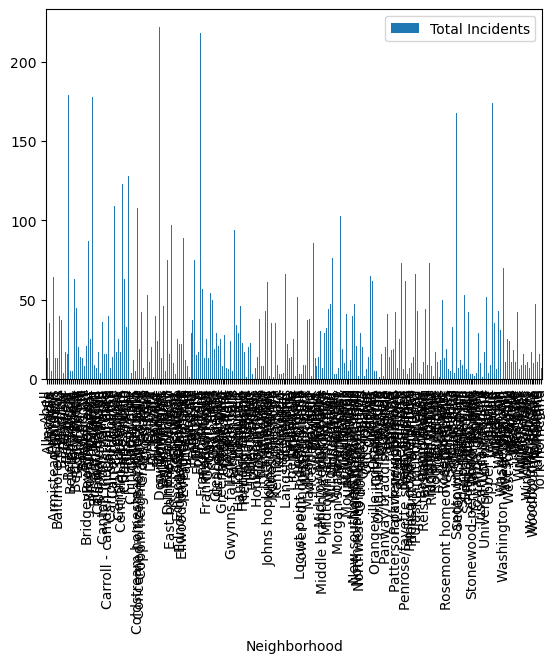

In [20]:
print(groupData.loc["2022"].plot(kind='bar'))

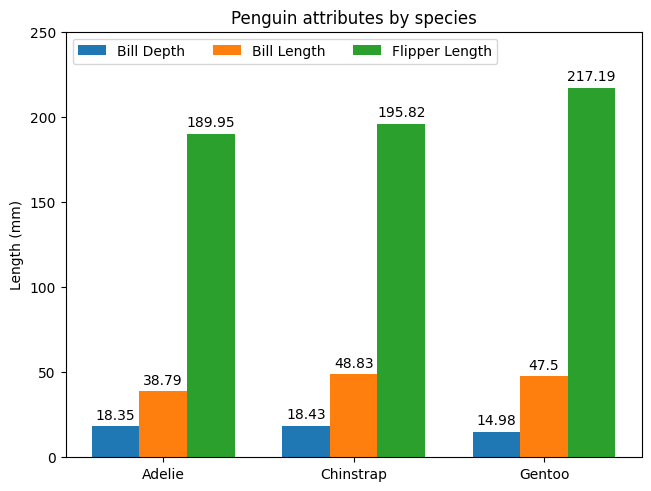

In [209]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neighborhood')
ax.set_title('2017')

ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()